Connecting with drive folder


Project data link
https://www.theforage.com/modules/NjynCWzGSaWXQCxSX/qredBPYHSnxdcdWBt?ref=qEGtkdpRKoiAYcTnL

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
# Maths
import math
from numpy import mean , std

In [2]:
#df = pd.read_csv("/content/drive/MyDrive/Analysis/Forge-Virtual-Intern/Case-2/customer_booking.csv", encoding="ISO-8859-1")
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head(100)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Internet,RoundTrip,8,33,3,Tue,AKLKUL,New Zealand,0,0,0,8.83,0
96,2,Internet,RoundTrip,138,35,19,Fri,AKLKUL,Switzerland,1,0,1,8.83,0
97,1,Internet,RoundTrip,134,37,20,Wed,AKLKUL,New Zealand,0,1,0,8.83,0
98,2,Internet,RoundTrip,8,29,18,Thu,AKLKUL,New Zealand,1,0,0,8.83,0


In [3]:
df[df['booking_complete']==1]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,1,Internet,RoundTrip,33,6,6,Wed,PENTPE,Taiwan,1,1,0,4.67,1
49977,2,Internet,RoundTrip,15,6,16,Tue,PENTPE,Malaysia,1,1,1,4.67,1
49980,4,Internet,RoundTrip,242,6,9,Tue,PENXIY,Malaysia,1,0,1,5.00,1
49984,2,Internet,RoundTrip,7,6,4,Wed,PERPNH,Australia,0,0,0,5.62,1


In [4]:
df["route"].nunique()

799

In [5]:
df["route"].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [6]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [7]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

## Information about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [9]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

- Format specifier %A is used to parse the full weekday name.
- To parse abbreviated weekday names, use %a format.
- weekday names like "Mon", "Tue", "Wed", etc.
- Verify that the weekday column is of type string

In [10]:
#df["flight_day"] = df["flight_day"].astype("string")

In [11]:
#df["day-num"] = pd.to_datetime(df["flight_day"], format="%a").dt.weekday

In [12]:
# Chnage the week day name to week day number where Monday = 0

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [13]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [15]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [16]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [17]:
country = df["booking_origin"].value_counts()

In [18]:
country

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [19]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

# Data Visualization

In [20]:
df["trip_type"].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

### Trip type

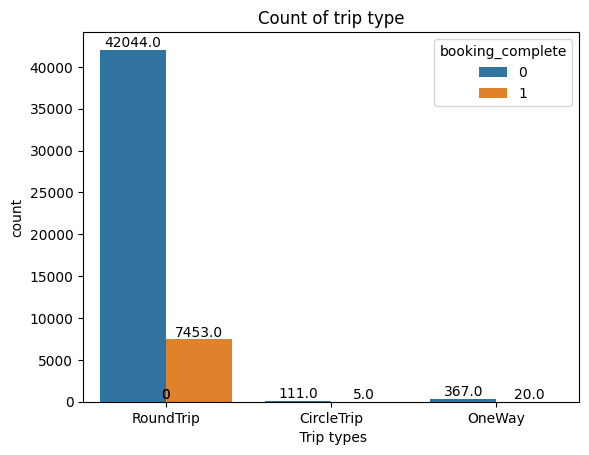

In [21]:
g= sns.countplot(x= df["trip_type"], hue=df['booking_complete'])
for p in g.patches:
  g.annotate(format(p.get_height()),
   (p.get_x() + p.get_width()/2. , p.get_height()),
              ha = 'center', va='center',
              xytext=(0,5),
              textcoords='offset points'

              )
plt.xlabel(" Trip types")
plt.title("Count of trip type")

plt.show()


## Sales channel

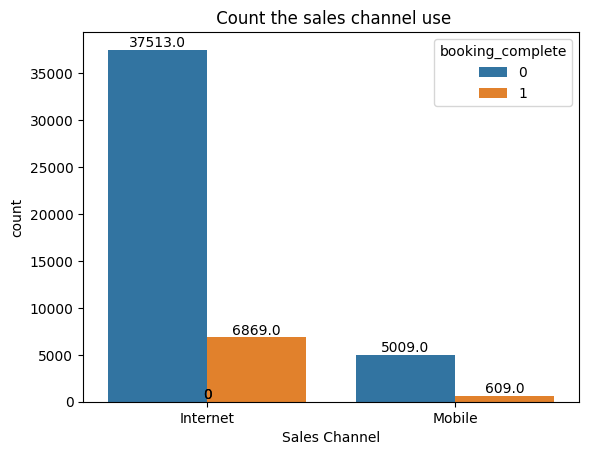

In [22]:
f = sns.countplot(x= "sales_channel", data = df,hue=df['booking_complete'])
for p in f.patches:
  f.annotate(format(p.get_height()),
             (p.get_x()+ p.get_width()/2, p.get_height()),
             ha= 'center', va='center',
             xytext=(0,5),
             textcoords = 'offset points'
               )
plt.xlabel("Sales Channel")
plt.title(" Count the sales channel use")
plt.show()


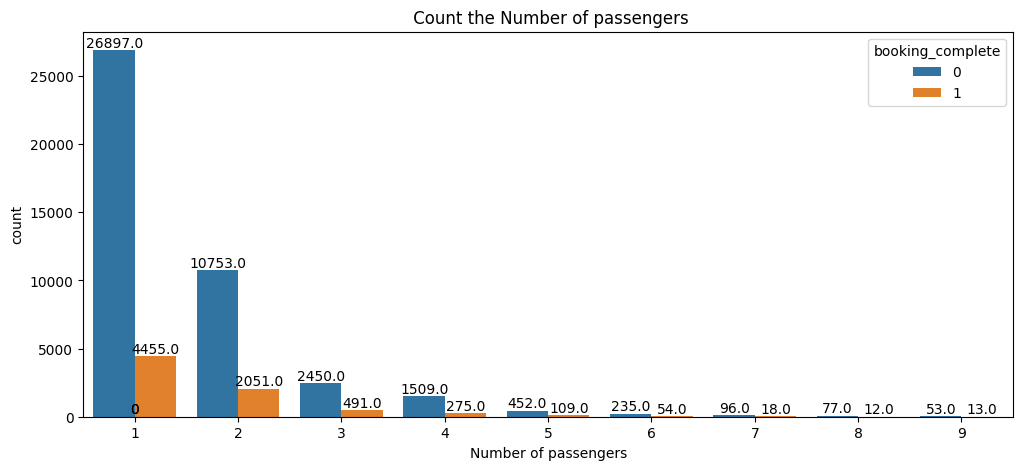

In [23]:
plt.figure(figsize=(12,5))
f = sns.countplot( data = df,x= "num_passengers",hue=df['booking_complete'])
for p in f.patches:
  f.annotate(format(p.get_height()),
             (p.get_x()+ p.get_width()/2, p.get_height()),
             ha= 'center', va='center',
             xytext=(0,5),
             textcoords = 'offset points'
               )
plt.xlabel("Number of passengers")

plt.title(" Count the Number of passengers")
plt.show()

In [24]:
def countplot(col, dataframe,label, size, hue):
  plt.figure(figsize =size)
  f = sns.countplot(x= col , data = dataframe, hue=hue)
  for p in f.patches:
    f.annotate(format(p.get_height()),
              (p.get_x()+ p.get_width()/2, p.get_height()),
              ha= 'center', va='center',
              xytext=(0,5),
              textcoords = 'offset points'
                )

  plt.xlabel(label)

  plt.title(label)
  plt.show()

## Target Variable

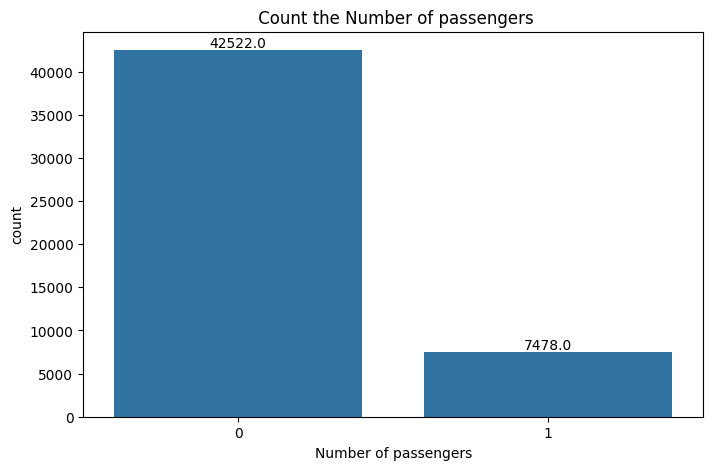

In [25]:
plt.figure(figsize=(8,5))
f = sns.countplot( data = df,x= 'booking_complete')
for p in f.patches:
  f.annotate(format(p.get_height()),
             (p.get_x()+ p.get_width()/2, p.get_height()),
             ha= 'center', va='center',
             xytext=(0,5),
             textcoords = 'offset points'
               )
plt.xlabel("Number of passengers")

plt.title(" Count the Number of passengers")
plt.show()

Target variable is skewd to one output

In [26]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

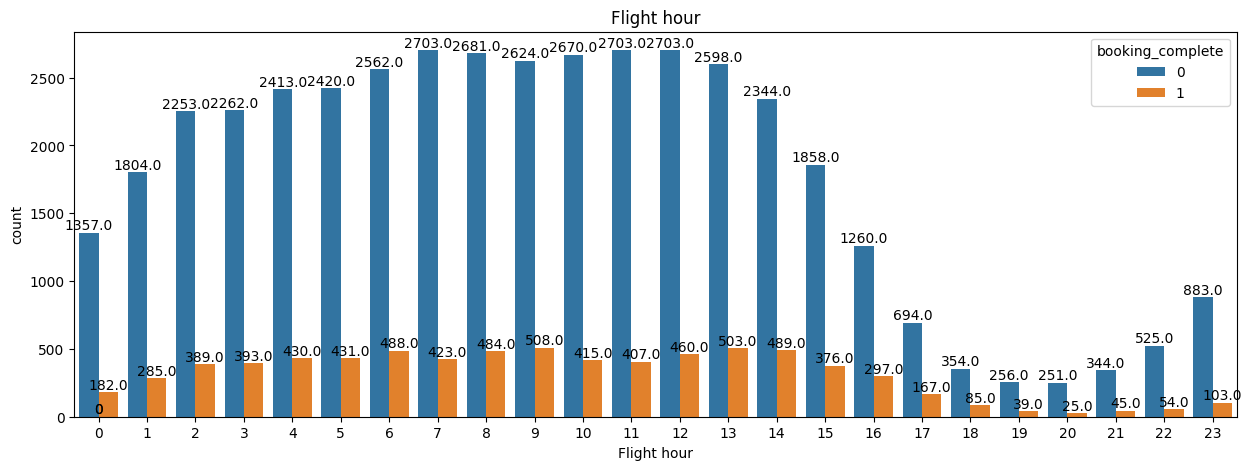

In [27]:
countplot("flight_hour", df, "Flight hour", (15,5) ,hue='booking_complete' )

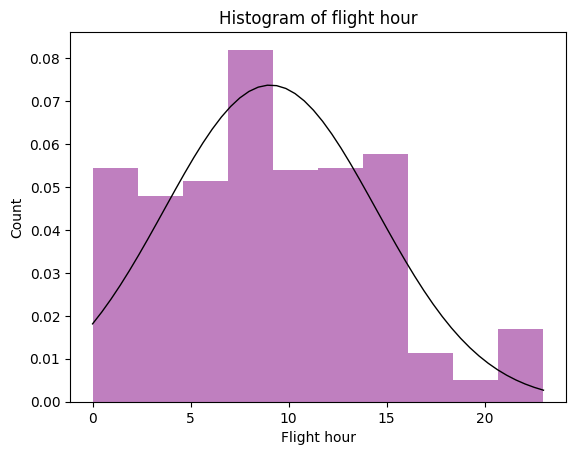

In [28]:
plt.hist(df["flight_hour"], bins= 10, density = True, alpha = 0.5, color = 'purple')
plt.xlabel('Flight hour')
plt.ylabel('Count')
plt.title('Histogram of flight hour')

# create range
x = np.linspace(max(df["flight_hour"]), min(df["flight_hour"]))

# compute normal distribution
mu , std = norm.fit(df["flight_hour"])

# compute desity curve

pdf = norm.pdf(x,mu,std)

# plot the pdf

plt.plot(x, pdf, 'black', linewidth =1)

plt.show()

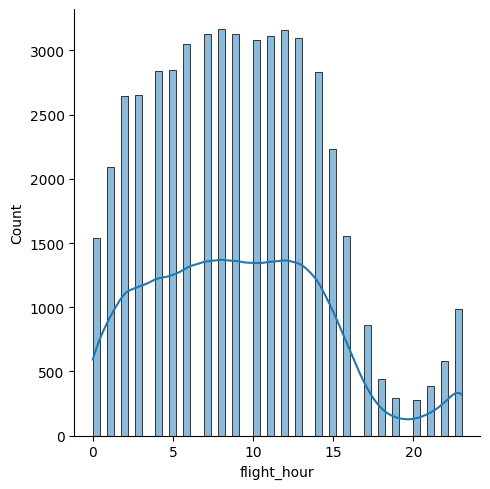

In [29]:
sns.displot(df["flight_hour"], kde= True)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [31]:
#sns.pairplot(df)

## Booking origine

In [32]:
print("Total unique bookinf origine ", df.booking_origin.nunique())

Total unique bookinf origine  104


In [33]:
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [34]:
df.booking_origin[df['booking_origin'] == '(not set)'].value_counts()

booking_origin
(not set)    84
Name: count, dtype: int64

In [35]:
df[['route','booking_origin']]

,route,booking_origin
0,AKLDEL,New Zealand
1,AKLDEL,New Zealand
2,AKLDEL,India
3,AKLDEL,New Zealand
4,AKLDEL,India
...,...,...
49995,PERPNH,Australia
49996,PERPNH,Australia
49997,PERPNH,Australia
49998,PERPNH,Australia


In [36]:
df[['route','booking_origin']][ (df['route']=='DPSPVG')]

,route,booking_origin
10972,DPSPVG,Austria
10973,DPSPVG,(not set)
10974,DPSPVG,Mexico
10975,DPSPVG,Russia
10976,DPSPVG,China
...,...,...
45820,DPSPVG,China
45821,DPSPVG,China
45822,DPSPVG,China
45823,DPSPVG,China


In [37]:
df[['route','booking_origin']][(df['booking_origin'] == '(not set)') & (df['route']=='DPSPVG')]

,route,booking_origin
10973,DPSPVG,(not set)
37741,DPSPVG,(not set)
37802,DPSPVG,(not set)
37813,DPSPVG,(not set)
37824,DPSPVG,(not set)
37842,DPSPVG,(not set)
37844,DPSPVG,(not set)
37859,DPSPVG,(not set)
37860,DPSPVG,(not set)
45699,DPSPVG,(not set)


In [38]:
#copy the dataset
df2 = df.copy()

In [39]:
df2.booking_origin.value_counts().sort_index()


booking_origin
(not set)                  84
Afghanistan                 1
Algeria                     1
Argentina                   6
Australia               17872
                        ...  
United Arab Emirates       42
United Kingdom            173
United States             456
Vanuatu                     1
Vietnam                   388
Name: count, Length: 104, dtype: int64

In [40]:
#display(df2.booking_origin.value_counts().sort_values(ascending=False))

In [41]:
booking_origin = df2.groupby('booking_origin')['booking_origin'].agg('count').sort_values(ascending=False)

In [42]:
booking_origin

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Seychelles                  1
Tonga                       1
Tanzania                    1
Svalbard & Jan Mayen        1
Vanuatu                     1
Name: booking_origin, Length: 104, dtype: int64

In [43]:
booking_origin['(not set)']

np.int64(84)

In [44]:
booking_origin[booking_origin <= 100]

booking_origin
(not set)               84
Sri Lanka               73
France                  59
Italy                   58
Canada                  57
                        ..
Seychelles               1
Tonga                    1
Tanzania                 1
Svalbard & Jan Mayen     1
Vanuatu                  1
Name: booking_origin, Length: 85, dtype: int64

In [45]:
df2['booking_origin'].nunique()

104

In [46]:
len(booking_origin[booking_origin <50])

78

In [47]:
# booking less then 100 in a booking origine
booking_origin_less_100 = booking_origin[booking_origin < 100]
len(booking_origin_less_100 )

85

In [48]:
# booking less then 100 in a booking origine
booking_origin_less_50= booking_origin[booking_origin < 50]
len(booking_origin_less_50 )

78

In [49]:
booking_origin_less_100

booking_origin
(not set)               84
Sri Lanka               73
France                  59
Italy                   58
Canada                  57
                        ..
Seychelles               1
Tonga                    1
Tanzania                 1
Svalbard & Jan Mayen     1
Vanuatu                  1
Name: booking_origin, Length: 85, dtype: int64

In [50]:
booking_origin[booking_origin > 100]

booking_origin
Australia         17872
Malaysia           7174
South Korea        4559
Japan              3885
China              3387
Indonesia          2369
Taiwan             2077
Thailand           2030
India              1270
New Zealand        1074
Singapore          1044
United States       456
Vietnam             388
Macau               304
Hong Kong           295
Philippines         266
United Kingdom      173
Brunei              167
Cambodia            132
Name: booking_origin, dtype: int64

In [51]:
df2 = df.copy()

In [52]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [53]:
booking_origin_less_50

booking_origin
Netherlands             46
Mauritius               44
United Arab Emirates    42
Nepal                   40
Saudi Arabia            36
                        ..
Seychelles               1
Tonga                    1
Tanzania                 1
Svalbard & Jan Mayen     1
Vanuatu                  1
Name: booking_origin, Length: 78, dtype: int64

In [54]:
len(booking_origin_less_50)

78

In [55]:
#Chnage the booking orine name to others to reduce unique booking origine
df2['booking_origin'] = df2['booking_origin'].apply(lambda x :'others' if x in booking_origin_less_50 else x )

In [56]:
df2['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'others', 'Germany', 'Indonesia',
       'Vietnam', 'Thailand', 'Italy', '(not set)', 'Hong Kong',
       'Philippines', 'Sri Lanka', 'France', 'United States', 'Australia',
       'Cambodia', 'Taiwan', 'Brunei', 'Canada', 'Macau',
       'Myanmar (Burma)'], dtype=object)

In [57]:
len(df2['booking_origin'].unique())

27

## Route

In [58]:
df2[['route','booking_complete']].tail(20)

,route,booking_complete
49980,PENXIY,1
49981,PENXIY,0
49982,PENXIY,0
49983,PERPNH,0
49984,PERPNH,1
49985,PERPNH,0
49986,PERPNH,0
49987,PERPNH,1
49988,PERPNH,0
49989,PERPNH,0


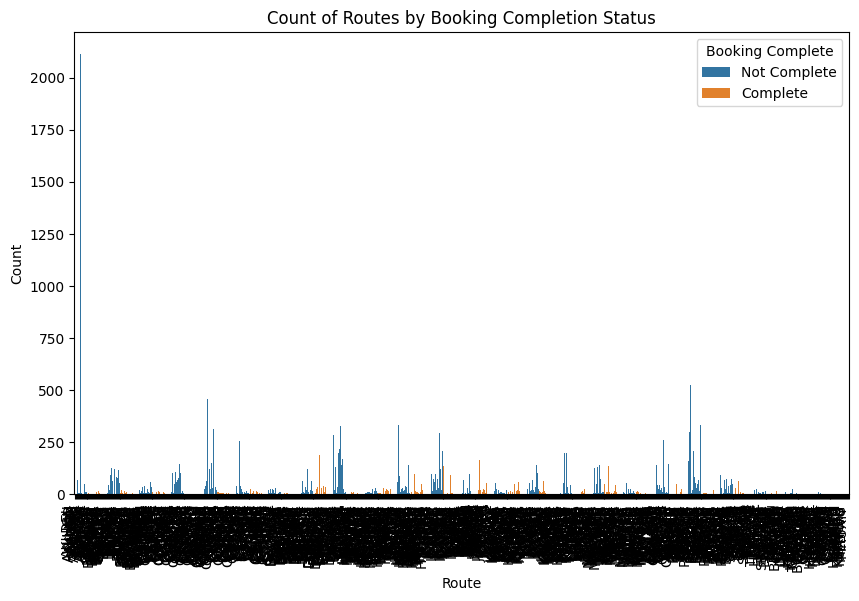

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(data=df2, x='route', hue='booking_complete')
plt.xticks(rotation=90, ha='right' ) # Rotate x labels if they overlap

# Adding labels and title
plt.title('Count of Routes by Booking Completion Status')
plt.xlabel('Route')
plt.ylabel('Count')
plt.legend(title='Booking Complete', labels=['Not Complete', 'Complete'])

# Display the plot
plt.show()

In [60]:
print("Total qunique route ", df.route.nunique())

Total qunique route  799


In [61]:
#count the route
route = df['route'].value_counts().sort_values(ascending=False).reset_index()
route

,route,count
0,AKLKUL,2680
1,PENTPE,924
2,MELSGN,842
3,ICNSIN,801
4,DMKKIX,744
...,...,...
794,IKAKCH,1
795,CKGLOP,1
796,JEDPEN,1
797,AKLHGH,1


In [62]:
#count the route for 'booking_complete' is complete
route_c = df['route'][df['booking_complete']==1].value_counts().sort_values(ascending=False).reset_index()

In [63]:
route_c

,route,count
0,AKLKUL,567
1,PENTPE,401
2,DMKKIX,187
3,JHBKTM,164
4,MELPEN,137
...,...,...
544,AKLPVG,1
545,MELNRT,1
546,MELMLE,1
547,NRTSYD,1


In [64]:
#count the route for 'booking_complete' is not complete
route_nc = df['route'][df['booking_complete']==0].value_counts().sort_values(ascending=False).reset_index()
route_nc

,route,count
0,AKLKUL,2113
1,MELSGN,799
2,ICNSIN,711
3,ICNSYD,690
4,DMKPER,642
...,...,...
781,CMBWUH,1
782,CKGLOP,1
783,NRTSYD,1
784,MELVTE,1


In [65]:
# Renaming the columns for clarity
route_c.columns = ['route', 'count_c']
route_nc.columns = ['route', 'count_nc']

In [66]:
# Merging the two dataframes on the 'route' column
route_m = pd.merge(route_c, route_nc, how='left', on='route')

# Fill NaN values with 0 in case a route is only in one of the dataframes
route_m.fillna(0, inplace=True)

# Convert count columns to integer type (optional)
route_m['count_c'] = route_m['count_c'].astype(int)
route_m['count_nc'] = route_m['count_nc'].astype(int)
route_m

,route,count_c,count_nc
0,AKLKUL,567,2113
1,PENTPE,401,523
2,DMKKIX,187,557
3,JHBKTM,164,245
4,MELPEN,137,512
...,...,...,...
544,AKLPVG,1,2
545,MELNRT,1,0
546,MELMLE,1,10
547,NRTSYD,1,1


In [67]:
# Merging the two dataframes on the 'route' column
route_mc = pd.merge(route, route_m, how='left', on='route')
# Fill NaN values with 0 in case a route is only in one of the dataframes
route_mc.fillna(0, inplace=True)

# Convert count columns to integer type (optional)
route_mc['count_c'] = route_mc['count_c'].astype(int)
route_mc['count_nc'] = route_mc['count_nc'].astype(int)
route_mc['count'] = route_mc['count'].astype(int)

#dataframe with counting
route_mc


,route,count,count_c,count_nc
0,AKLKUL,2680,567,2113
1,PENTPE,924,401,523
2,MELSGN,842,43,799
3,ICNSIN,801,90,711
4,DMKKIX,744,187,557
...,...,...,...,...
794,IKAKCH,1,0,0
795,CKGLOP,1,0,0
796,JEDPEN,1,1,0
797,AKLHGH,1,0,0


In [68]:
route_mc[route_mc['count']< 100]

,route,count,count_c,count_nc
123,BKIOOL,99,17,82
124,CEBMEL,98,14,84
125,BKIPEK,98,22,76
126,KCHPEK,98,20,78
127,BKIKIX,97,34,63
...,...,...,...,...
794,IKAKCH,1,0,0
795,CKGLOP,1,0,0
796,JEDPEN,1,1,0
797,AKLHGH,1,0,0


In [69]:
# find the route use less then 100 times
route_less_100= route[route['count'] <100]
route_less_100

,route,count
123,BKIOOL,99
124,CEBMEL,98
125,BKIPEK,98
126,KCHPEK,98
127,BKIKIX,97
...,...,...
794,IKAKCH,1
795,CKGLOP,1
796,JEDPEN,1
797,AKLHGH,1


In [70]:
len(route_less_100['route'])

676

In [71]:
#Chnage the route name to others to reduce unique rout name
df2['route']= df2['route'].apply(lambda x : 'others' if x in route_less_100['route'].values else x )


In [72]:
df2.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [73]:
df2['route'].value_counts()

route
others    15211
AKLKUL     2680
PENTPE      924
MELSGN      842
ICNSIN      801
          ...  
HKGMEL      106
PEKSYD      103
PEKSIN      102
CNXPER      101
DPSHGH      100
Name: count, Length: 124, dtype: int64

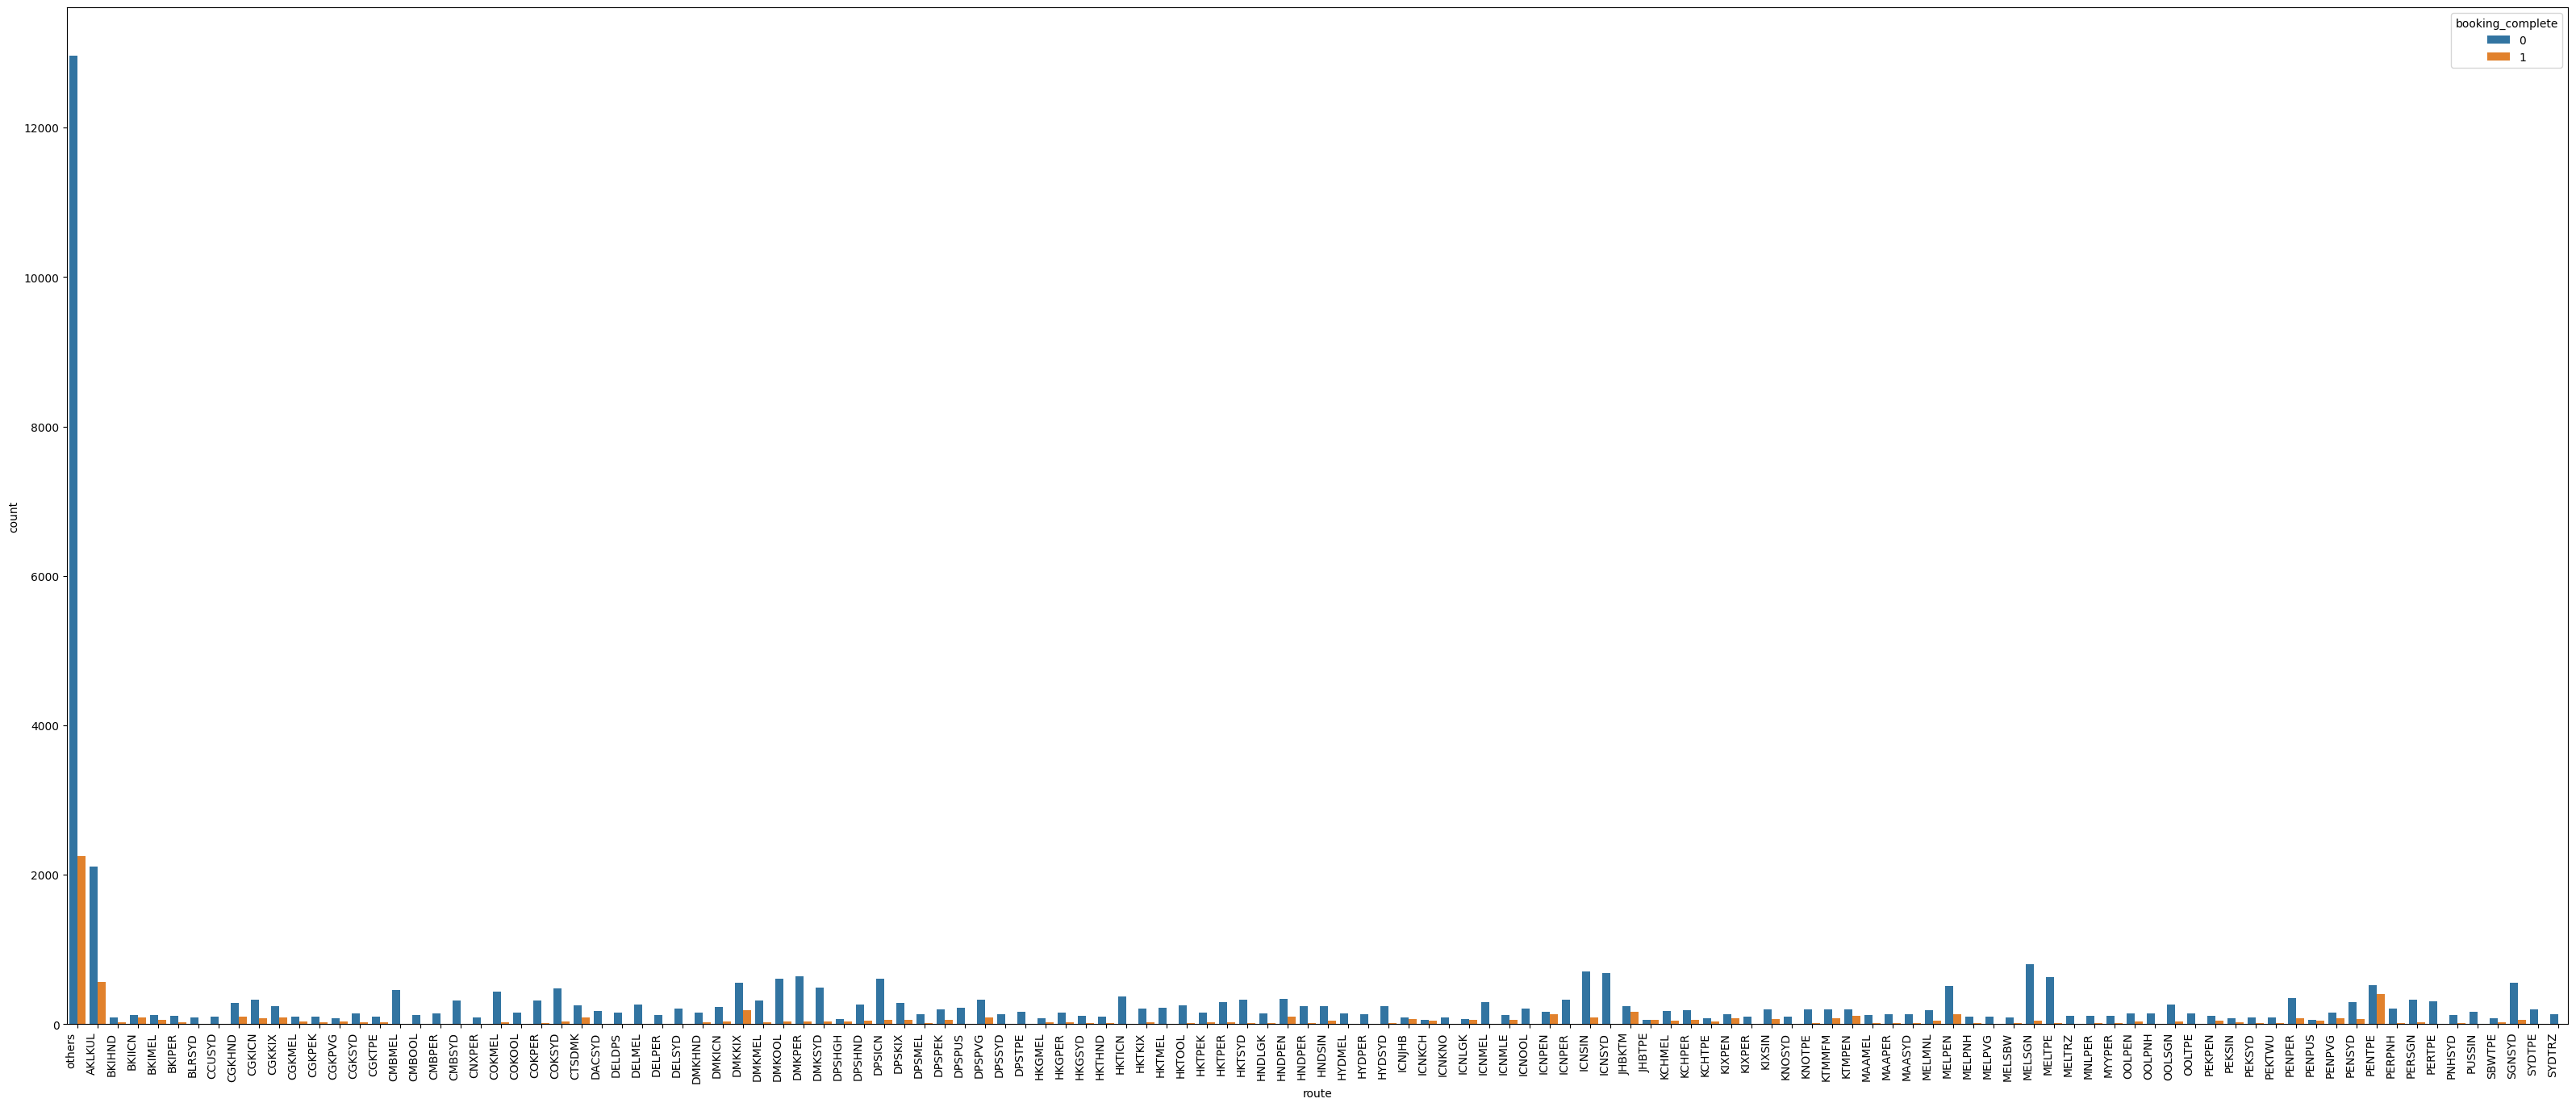

In [74]:
# Count plot on route with booking complete or not
plt.figure(figsize=(40,20))
sns.countplot(data=df2, x='route', hue='booking_complete')
plt.xticks(rotation=90, ha='right' ) # Rotate x labels if they overlap
# Add extra space between the x labels
plt.gcf().subplots_adjust(bottom=0.25)
plt.show()

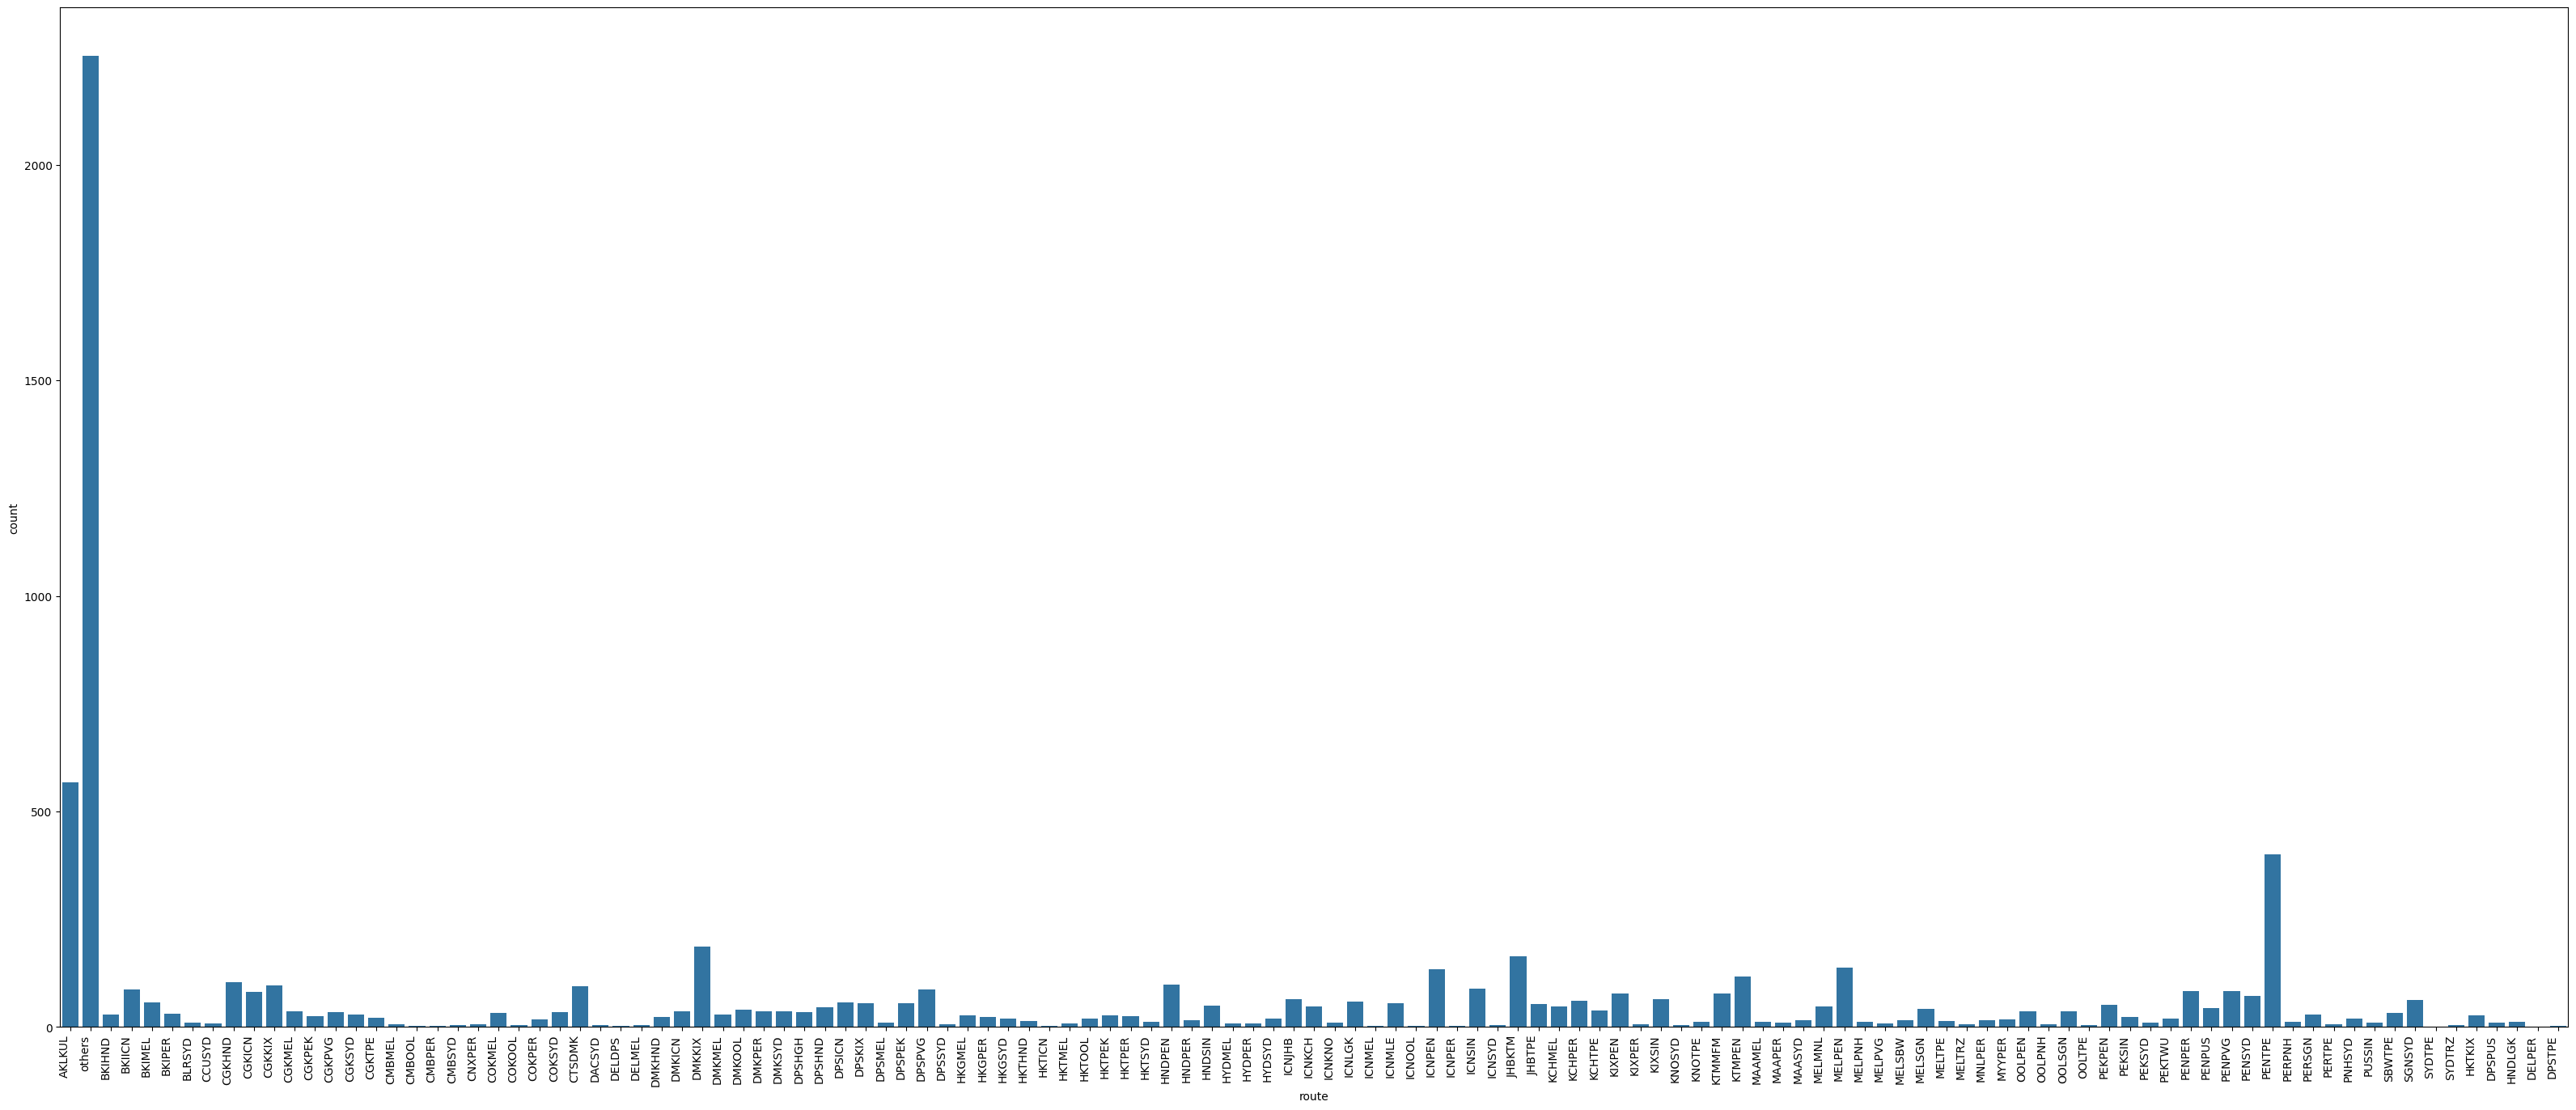

In [75]:
# Count plot on route of booking complete
plt.figure(figsize=(40,20))
sns.countplot(data=df2, x=df2[df2['booking_complete']==1]['route'])
plt.xticks(rotation=90, ha='right' ) # Rotate x labels if they overlap
# Add extra space between the x labels
plt.gcf().subplots_adjust(bottom=0.25)
plt.show()

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

# Save the modified dataset

In [77]:
#save the modified dataset
#df2.to_csv("modified_BA_flight_data.csv", index= None)

In [79]:
df2.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

# Length of stay 

In [80]:
df2['length_of_stay'].describe()

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%         17.00000
75%         28.00000
max        778.00000
Name: length_of_stay, dtype: float64

<Axes: xlabel='length_of_stay'>

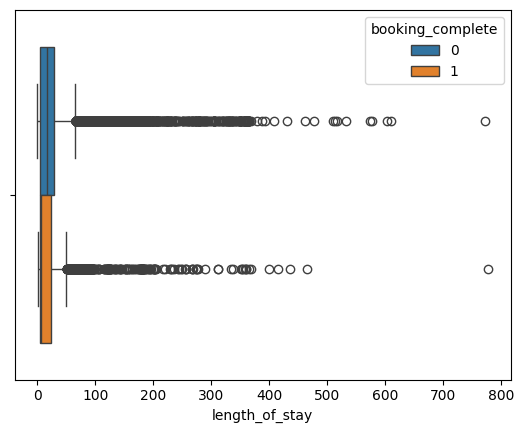

In [81]:
sns.boxplot(data=df2,x= 'length_of_stay',hue='booking_complete' )

In [82]:
length_of_stay = df2.groupby('length_of_stay')['length_of_stay'].agg('count').sort_values(ascending=False)
length_of_stay

length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
577       1
603       1
610       1
773       1
778       1
Name: length_of_stay, Length: 335, dtype: int64

In [86]:
# Interquartaile range (IQR) identification 
seventy_fifth = df2['length_of_stay'].quantile(.75)
twenty_fifth = df2['length_of_stay'].quantile(.25)
stay_iqr = seventy_fifth - twenty_fifth
print(stay_iqr)

23.0


In [88]:
# Outliers calculation

#upper threshold
upper = seventy_fifth + (1.5* stay_iqr)
print(upper)

#lower threshold

lower = twenty_fifth - (1.5* stay_iqr)
print(lower)

62.5
-29.5


In [96]:
# substracting the upper threshold

df3 = df2[(df2['length_of_stay'] < lower)  | (df2['length_of_stay'] > upper) ]

In [97]:
df3

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
18,1,Internet,RoundTrip,67,155,8,7,others,New Zealand,1,0,0,5.52,0
21,1,Internet,RoundTrip,21,88,9,3,others,South Korea,1,0,1,6.62,0
31,2,Internet,RoundTrip,7,82,4,4,others,South Korea,1,0,1,6.62,0
41,1,Internet,RoundTrip,71,90,7,4,others,South Korea,1,1,1,6.62,0
43,1,Internet,RoundTrip,9,84,7,3,others,New Zealand,1,0,0,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25580,1,Internet,RoundTrip,129,63,15,5,others,Taiwan,1,0,1,5.13,0
25581,1,Internet,RoundTrip,127,67,8,7,others,China,1,0,1,5.13,0
25582,1,Internet,RoundTrip,127,67,8,7,others,China,1,0,1,5.13,0
25586,1,Internet,RoundTrip,129,63,17,5,others,Taiwan,1,0,1,5.13,0


In [98]:
length_of_stay2 = df3.groupby('length_of_stay')['length_of_stay'].agg('count').sort_values(ascending=False)
length_of_stay2

length_of_stay
89     197
88     173
90     168
91     158
87     150
      ... 
577      1
603      1
610      1
773      1
778      1
Name: length_of_stay, Length: 282, dtype: int64

<Axes: ylabel='length_of_stay'>

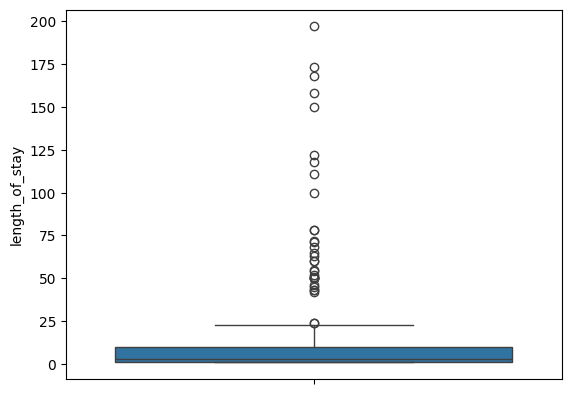

In [92]:
sns.boxplot(length_of_stay2)

In [106]:
df3['length_of_stay']

18       155
21        88
31        82
41        90
43        84
        ... 
25580     63
25581     67
25582     67
25586     63
25592     67
Name: length_of_stay, Length: 3807, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

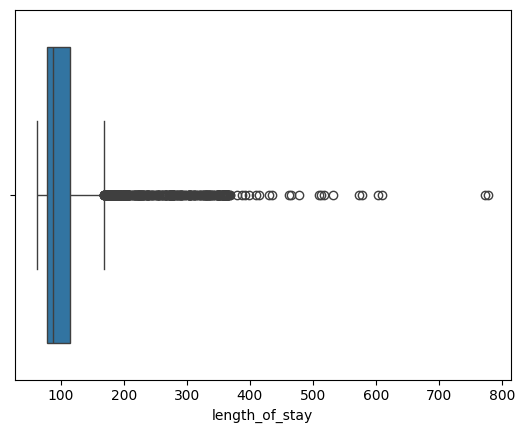

In [104]:
sns.boxplot( data= df3, x= 'length_of_stay' #,hue='booking_complete' 
            )
plt.show

<Axes: ylabel='length_of_stay'>

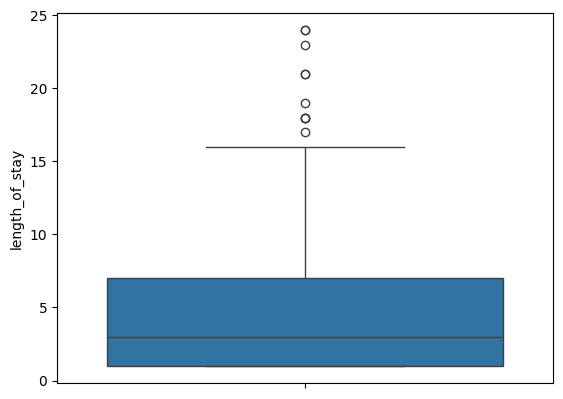

In [83]:
sns.boxplot(length_of_stay[length_of_stay < 28])

In [84]:
len(df[df['length_of_stay']<17])

24673

Removing Outlier

In [ ]:
df2 = pd.read_csv("modified_BA_flight_data.csv", index_col=None)

# Data Manupulation

In [66]:
df4 = df2.copy()

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [68]:
"""encoder = LabelEncoder()
df4["trip_type"] = encoder.fit_transform(df4["trip_type"])
df4["sales_channel"] = encoder.fit_transform(df4["sales_channel"])
df4["route"] = encoder.fit_transform(df4["route"])
df4["booking_origin"] = encoder.fit_transform(df4["booking_origin"])"""

'encoder = LabelEncoder()\ndf4["trip_type"] = encoder.fit_transform(df4["trip_type"])\ndf4["sales_channel"] = encoder.fit_transform(df4["sales_channel"])\ndf4["route"] = encoder.fit_transform(df4["route"])\ndf4["booking_origin"] = encoder.fit_transform(df4["booking_origin"])'

In [69]:
df4.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,others,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,others,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,others,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,others,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,others,India,1,0,1,5.52,0


In [70]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [71]:
df4.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

## Spliting train test dataset

In [72]:
# x is the features and y is the target variable

x = df4.drop('booking_complete', axis= 'columns')
y = df4['booking_complete']

In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [74]:
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,others,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,others,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,others,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,others,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,others,India,1,0,1,5.52


### Random spliting

In [75]:
# random spliting
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.18, train_size=0.8, random_state=42)

In [76]:
x_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
3277,1,Internet,RoundTrip,169,22,1,2,CCUMEL,Australia,1,0,0,8.83
31411,1,Internet,RoundTrip,105,4,17,4,DPSKIX,Australia,1,0,1,7.00
29512,4,Internet,RoundTrip,28,4,6,3,BKIICN,South Korea,1,0,1,6.62
14889,2,Internet,RoundTrip,62,91,13,5,IKAOOL,Australia,1,0,1,8.83
31593,2,Internet,RoundTrip,128,4,4,1,DPSTPE,United States,0,0,0,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,1,Internet,RoundTrip,31,34,8,1,HKGPER,Australia,1,0,0,5.62
27139,1,Internet,RoundTrip,114,3,9,3,DMKKIX,Japan,0,1,0,7.00
6767,1,Internet,RoundTrip,56,32,6,4,COKPER,Australia,1,1,1,5.62
5622,1,Internet,RoundTrip,36,88,2,5,others,Thailand,1,0,1,7.57


In [77]:
x_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
3277,1,Internet,RoundTrip,169,22,1,2,CCUMEL,Australia,1,0,0,8.83
31411,1,Internet,RoundTrip,105,4,17,4,DPSKIX,Australia,1,0,1,7.00
29512,4,Internet,RoundTrip,28,4,6,3,BKIICN,South Korea,1,0,1,6.62
14889,2,Internet,RoundTrip,62,91,13,5,IKAOOL,Australia,1,0,1,8.83
31593,2,Internet,RoundTrip,128,4,4,1,DPSTPE,United States,0,0,0,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,1,Internet,RoundTrip,31,34,8,1,HKGPER,Australia,1,0,0,5.62
27139,1,Internet,RoundTrip,114,3,9,3,DMKKIX,Japan,0,1,0,7.00
6767,1,Internet,RoundTrip,56,32,6,4,COKPER,Australia,1,1,1,5.62
5622,1,Internet,RoundTrip,36,88,2,5,others,Thailand,1,0,1,7.57


### Stratifeid sampling Spliting

In [78]:
# Using Stratifeid sampling based on booking origin

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.18,train_size=0.8, random_state= 42)
for train_index , test_index in split.split(df4,df4['booking_origin']):
    strian_set = df4.loc[train_index]
    stest_set = df4.loc[test_index]

In [79]:
strian_set.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
5764,1,Internet,RoundTrip,403,20,0,4,CNXOOL,Australia,1,0,0,8.83,0
49953,8,Internet,RoundTrip,328,6,17,6,PENTPE,Malaysia,1,1,1,4.67,1
7569,1,Internet,RoundTrip,22,28,5,1,others,China,0,0,0,4.72,0
27906,1,Internet,RoundTrip,397,3,15,7,HNDSIN,Japan,0,0,0,7.57,0
10898,1,Mobile,RoundTrip,353,20,10,7,DPSPEK,China,0,0,0,6.42,0


In [80]:


strain_x = strian_set.drop('booking_complete', axis= 'columns')
strain_y = strian_set['booking_complete']

stest_x = stest_set.drop('booking_complete', axis= 'columns')
stest_y = stest_set['booking_complete']

# Feature Scaling

In [81]:
cat_attribs = ['route','booking_origin','sales_channel', 'trip_type' ]
#label_attribs = []
num_attribs = ['num_passengers', 'purchase_lead',
                'length_of_stay','flight_hour', 'flight_day',
                'wants_extra_baggage', 'wants_preferred_seat',
                'wants_in_flight_meals', 'flight_duration']



In [82]:
# Instead of writing out the full list above, we could use these pandas methods:
'''numeric_features = x_train.select_dtypes('number').columns
categorical_features = x_train.select_dtypes('object').columns'''

"numeric_features = x_train.select_dtypes('number').columns\ncategorical_features = x_train.select_dtypes('object').columns"

In [83]:
#making pipline
numeric_transformer = Pipeline(
    steps=[#("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[#("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
           ("onehot", OneHotEncoder(handle_unknown="ignore",sparse_output=False))]
)

col_transformer = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, num_attribs),
        ("categorical", categorical_transformer, cat_attribs)
    ], 
    remainder='passthrough'    
)

In [84]:
# train and tranform the  columns to encoding an scaling
strain_x_pp= col_transformer.fit_transform(strain_x)
x_train_pp = col_transformer.fit_transform(x_train)

In [85]:
#Onehot column name for dataframe
onehot_cols = (
    col_transformer
    .named_transformers_["categorical"]
    .named_steps["onehot"]
    .get_feature_names_out(cat_attribs)
)
columns = num_attribs + onehot_cols.tolist()

In [86]:
# converted to dataframe
strain_x_pd = pd.DataFrame(strain_x_pp, columns=columns)
x_train_pd = pd.DataFrame(x_train_pp, columns=columns)

In [87]:
strain_x_pd.head()



,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,route_AKLICN,...,booking_origin_Thailand,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam,booking_origin_others,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,-0.580297,3.518241,-0.089668,-1.675833,0.090174,0.702167,-0.650059,-0.864927,1.035742,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,6.301959,2.689041,-0.507132,1.466706,1.093646,0.702167,1.538323,1.156167,-1.742747,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.580297,-0.694096,0.148884,-0.751557,-1.415032,-1.424162,-0.650059,-0.864927,-1.709351,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.580297,3.451905,-0.596589,1.096996,1.595381,-1.424162,-0.650059,-0.864927,0.194180,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.580297,2.965441,-0.089668,0.172719,1.595381,-1.424162,-0.650059,-0.864927,-0.573911,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [88]:
x_train_pd.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,route_AKLICN,...,booking_origin_Thailand,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vietnam,booking_origin_others,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,-0.580642,0.930427,-0.031671,-1.491084,-0.910422,0.704470,-0.648036,-0.861179,1.039152,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.580642,0.222093,-0.566473,1.466755,0.092328,0.704470,-0.648036,1.161199,-0.182088,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.363913,-0.630120,-0.566473,-0.566759,-0.409047,0.704470,-0.648036,1.161199,-0.435678,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.400877,-0.253818,2.018403,0.727296,0.593703,0.704470,-0.648036,1.161199,1.039152,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.400877,0.476651,-0.566473,-0.936489,-1.411797,-1.419507,-0.648036,-0.861179,-1.736999,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [89]:
strain_x_pd.shape

(40000, 258)

In [90]:
df4.shape

(50000, 14)

In [91]:
from sklearn import set_config

set_config(display='diagram')

In [92]:
# ML model Pipeline
"""pipe = Pipeline(
    steps=[
        ("preprocessor", col_transformer), 
        ("reg", KNeighborsRegressor())])
pipe"""

'pipe = Pipeline(\n    steps=[\n        ("preprocessor", col_transformer), \n        ("reg", KNeighborsRegressor())])\npipe'

In [93]:
df4.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,others,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,others,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,others,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,others,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,others,India,1,0,1,5.52,0


# Features weight checking
Make a pair plot with hue by booking info, to check witch featurs are mostly classify the test dataset


In [94]:
sns.pairplot(data= x_train_pd, hue = "booking_complete" )
plt.show()

: 

: 

#  Model Building</h2>


In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

Choose the ML algorithm from 

1. LogisiticRegression
2. DecisionTreeClassifier
3. XGBClassifier
4. LGBMClassifier
5. Support vector Machine
6. Random Forest
7. Support Vector 
8. Naive Bayes
9. Stochastic gradient descent


In [ ]:
#! pip install lightgbm

### Installing Libreries

In [ ]:
# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict,cross_val_score, RepeatedStratifiedKFold
from   sklearn.linear_model import LogisticRegression, LinearRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.svm import SVC
from   sklearn.linear_model import SGDClassifier

from   xgboost import XGBClassifier
#from   lightgbm import LGBMClassifier
from   sklearn.naive_bayes import GaussianNB
from   sklearn.neighbors import KNeighborsClassifier
#from   imblearn.over_sampling import RandomOverSampler
import pickle

#Clasturing 
from sklearn.cluster import KMeans

# Evalution
from   sklearn.metrics import classification_report, accuracy_score, roc_auc_score, RocCurveDisplay,roc_curve, auc, f1_score
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix
import sklearn.metrics

#plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead

In [ ]:
# for ML model call
def get_models():
  models = dict()
  #models['XGB'] = XGBClassifier()
  #models['LGBM'] = LGBMClassifier()
  #models['lr'] = LinearRegression()
  models['logr'] = LogisticRegression(solver='newton-cholesky', max_iter=1000)
  models['knn'] = KNeighborsClassifier()
  models['cart']= DecisionTreeClassifier()
  models['rnf'] = RandomForestClassifier()
  models['svc'] = SVC(gamma='auto')
  models['bayes'] = GaussianNB()
  models['SGD'] = SGDClassifier(loss='modified_huber', random_state=42)

  return models

In [ ]:
#xt means test data
def model_predict(x,y,model,cv):
  model.fit(x,y)
  #Use Cross CV prediction instead of test set(xt).
  Y_train_pre = cross_val_predict(model,x,y,cv=cv)

  return Y_train_pre  #Y_train_pred_prob

In [ ]:
# evaluate a given model using cross-validation
def evalute_model(model,x,y):
  #if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used
  Cv= RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=28)
  score = cross_val_score(model,x,y,scoring='f1', cv= Cv)
  return score

In [ ]:
#ROC plot function
def roc_display(y_train, Y_pre, model,name): 
    fpr, tpr, thresholds = roc_curve(y_train, Y_pre)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model )
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name = name)
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=10)
    display.plot()

In [ ]:
models = get_models()

In [ ]:
# SGDClassifier's hinge loss doesn't support probability estimates.
# We can set SGDClassifier as the base estimator in Scikit-learn's CalibratedClassifierCV, which will generate probability estimates.

from sklearn.calibration import CalibratedClassifierCV

In [ ]:
#xt means test data
"""def model_predict(x,y,model,cv):
  if model == 'SGD':
    new_clf_SGD = CalibratedClassifierCV(model)
    new_clf_SGD.fit(x,y)
    Y_train_pre = cross_val_predict(new_clf_SGD,x,y,cv=cv)
  else:
    model.fit(x,y)
    #Y_pre = model.predict(xt) 
    #Use Cross CV prediction instead of test set(xt).
    Y_train_pre = cross_val_predict(model,x,y,cv=cv)
    #Y_train_pred_prob = model.predict_proba(Y_train_pre)
  return Y_train_pre  #Y_train_pred_prob"""

In [ ]:
new_clf_SGD = CalibratedClassifierCV(models['SGD'])
new_clf_SGD.fit(strain_x_pd,strain_y)

In [ ]:

'''def model_pre_pro(x,y,model,xt):
  model.fit(x,y)
  Y_pred_prob = model.predict_proba(xt)
  return Y_pred_prob'''

In [ ]:
# x_train_pp 
# y_train
# strain_x_pp
# strain_y


In [ ]:
#ga = SGDClassifier(loss='modified_huber',alpha=0.0001, random_state=42)

In [ ]:

#ga.fit(strain_x_pd,strain_y)

In [ ]:
#Y_train_pre = cross_val_predict(ga,strain_x_pd,strain_y,cv= 5)

In [ ]:
#print(Counter(strain_y))

In [ ]:
#print(Counter(Y_train_pre))

**In this model test data don't use untile final model select.**

In scikit-learn, both DataFrames and Series can be used as inputs for models, but the preferred format is typically a NumPy array or a 2D array-like structure. 

#Select columns and convert to a 2D array-like
 
``` X = df.iloc[:, :-1].values           ```

In [ ]:
x_train_rand = x_train_pd.iloc[:, :-1].values

In [ ]:
type(x_train_rand)

In [ ]:
x_train_rand

### Initial Model testing

In [ ]:
#Predict Target value by Test data
Score = []
Algo =[]
CV_score =[]

for name, model in models.items():
    
    Y_pre= model_predict(x_train_pd,y_train,model,5)
    Score_DT = accuracy_score(y_train,Y_pre)
    #F1 = f1_score(Y_test,Y_pre)
    #print('>%s % .3f'% (name,Score_DT))
    report = classification_report(y_train,Y_pre)
    score = evalute_model(model,x_train_pd ,y_train)
    CV_score.append(mean(score))
    print(name)
    print(report)
    Algo.append(name)
    Score.append(Score_DT )
    confusion_matrix = multilabel_confusion_matrix(y_train,Y_pre)
    print(confusion_matrix)

In [ ]:
Classification_result = pd.DataFrame(list(zip(Algo,Score, CV_score)), columns=['Alo_name','Accuracy','CV_score'])
Classification_result

In [ ]:
sklearn.metrics.get_scorer_names()

In [ ]:
models.keys()

In [ ]:
# Making confusion matrix
for name, model in models.items():
  
  Y_pre = model_predict(x_train_pd,y_train,model,5)
  confusion_matrix = multilabel_confusion_matrix(y_train,Y_pre)
  print(name,confusion_matrix  )

### Creating ROC curve 

In [ ]:
# Creating ROC curve
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects false positive rate(fpr), true positive rate(tpr), thresholds 
for name, model in models.items():
    Y_pre = model_predict(x_train_pd,y_train,model,5)
    fpr, tpr, thresholds = roc_curve(y_train, Y_pre)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=name )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
plt.show()

In [ ]:
# ROC vurve with RocCurveDisplay()
for name, model in models.items():
    Y_pre = model_predict(x_train_pd,y_train,model,5)
    fpr, tpr, thresholds = roc_curve(y_train, Y_pre)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model )
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name = name)
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=10)
    display.plot()   


## Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression( max_iter=1000),
            'params': {
                'solver' : ['newton-cholesky','newton-cg','liblinear'],
                'C': [0.1, 1.0, 10.0],
                'penalty': ['none', 'l2'],
                }
            },
        'KNeighbors': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan', 'minkowski']
                }
            },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                }
            },
        'RandomForest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'max_features' : ['sqrt', 'log2']
                }
            },
        
        'GNB': {
            'model': GaussianNB(),
            'params': {
                
                }
            },

        'SVM': {
            'model': SVC( ),
            'params': {
                'C': [0.1, 1.0, 10.0,50.0],
                'kernel': ['linear', 'rbf','sigmoid'],
                'gamma':['auto','scale']
                
                }
            },

        'SGD': {
            'model': SGDClassifier(loss='modified_huber', random_state=42),
            'params': {
                'alpha': [0.0001, 0.001, 0.01],
                'penalty': ['l1', 'l2', 'elasticnet']
                }
            }
    }
    scores = []
    cv = RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=28)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv,scoring='f1', return_train_score=True)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# Find the best model
find_best_model_using_gridsearchcv(x_train_pd,y_train)

<h2> Best Model parameters</h2>
	model	best_score	best_params \n
0	logistic_regression	0.850008	{'C': 0.1, 'penalty': 'l1', 'solver': 'libline... \n
1	KNeighbors	0.839308	{'metric': 'manhattan', 'n_neighbors': 7, 'wei...
2	decision_tree	0.849283	{'max_depth': 5, 'min_samples_split': 5}
3	RandomForest	0.851333	{'max_depth': None, 'max_features': 'sqrt', 'm...
4	GNB	0.368500	{}
5	SGD	0.850225	{'alpha': 0.01, 'penalty': 'l1'}

## Model testing 

In [ ]:
# for ML model call 
# Parameter get from grid search
def get_models_1():
  models = dict()
  #models['XGB'] = XGBClassifier()
  #models['LGBM'] = LGBMClassifier()
  #models['lr'] = LinearRegression()
  models['logr'] = LogisticRegression(C=0.1, solver='newton-cholesky', max_iter=1000)
  models['knn'] = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7)
  models['cart']= DecisionTreeClassifier(max_depth= 5, min_samples_split= 5)
  models['rnf'] = RandomForestClassifier(max_depth= None, max_features = 'sqrt')
  models['svc'] = SVC(gamma='auto')
  models['bayes'] = GaussianNB()
  models['SGD'] = SGDClassifier(loss='modified_huber',alpha= 0.01, penalty = 'l1', random_state=42)
  
  return models

In [ ]:
models_1 = get_models_1()

In [ ]:
for name, model in models_1.items():
    print(name)

### With Random Train data

In [ ]:
#Predict Target value by Test data
Score = []
Algo =[]
CV_score =[]

for name, model in models_1.items():
    
    Y_pre= model_predict(x_train_pd,y_train,model,5)
    Score_DT = accuracy_score(y_train,Y_pre)
    #F1 = f1_score(Y_test,Y_pre)
    #print('>%s % .3f'% (name,Score_DT))
    report = classification_report(y_train,Y_pre)
    score = evalute_model(model,x_train_pd ,y_train)
    CV_score.append(mean(score))
    print(name)
    print(report)
    Algo.append(name)
    Score.append(Score_DT )
    #roc_display(y_train, Y_pre, model,name)

#### Confusion matrics

In [ ]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import multilabel_confusion_matrix

# Assuming you have defined the 'models' dictionary and 'model_predict' function


for name, model in models_1.items():
    Y_pre= model_predict(x_train_pd,y_train,model,5)
    confusion_mat = multilabel_confusion_matrix(y_train, Y_pre)

    # Print the confusion matrix for each class
    print(name)
    for i, cm in enumerate(confusion_mat):
        print(f"Confusion Matrix for Class {i}:\n{cm}\n")
    
    # Plot the confusion matrix heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(confusion_mat.sum(axis=0), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.show()


### Model test with Stratified train

In [ ]:
# strain_x_pp
# strain_y

In [ ]:
#Predict Target value by Test data
Score_s = []
Algo_s =[]
CV_score_s =[]

for name, model in models_1.items():
    
    Y_pre= model_predict(strain_x_pp,strain_y,model,5)
    Score_DT = accuracy_score(strain_y,Y_pre)
    #F1 = f1_score(Y_test,Y_pre)
    #print('>%s % .3f'% (name,Score_DT))
    report = classification_report(strain_y,Y_pre)
    score = evalute_model(model,strain_x_pp,strain_y)
    CV_score_s.append(mean(score))
    print(name)
    print(report)
    Algo_s.append(name)
    Score_s.append(Score_DT )
    #roc_display(y_train, Y_pre, model,name)

In [ ]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have defined the 'models' dictionary and 'model_predict' function


for name, model in models_1.items():
    Y_pre= model_predict(strain_x_pp,strain_y,model,5)
    confusion_mat = confusion_matrix(strain_y, Y_pre)

    # Print the confusion matrix for each class
    print(name)
    for i, cm in enumerate(confusion_mat):
        print(f"Confusion Matrix for Class {i}:\n{cm}\n")
    
    # Plot the confusion matrix heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have defined the 'models' dictionary and 'model_predict' function


for name, model in models_1.items():
    Y_pre= model_predict(strain_x_pp,strain_y,model,5)
    confusion_mat = multilabel_confusion_matrix(strain_y, Y_pre)

    # Print the confusion matrix for each class
    print(name)
    for i, cm in enumerate(confusion_mat):
        print(f"Confusion Matrix for Class {i}:\n{cm}\n")
    
    # Plot the confusion matrix heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(confusion_mat.sum(axis=0), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix Heatmap for {name}")
    plt.show()